In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
import scipy as sp
%matplotlib inline
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats
import warnings                    # suppress warning messages
def warn(*args, **kwargs):
    pass
warnings.warn = warn
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

C:\Users\HP\AppData\Local\Temp\ipykernel_26596\2188749943.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Import the dataset and showing its shape

In [2]:
# Load train and Test set
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
print("The train data size is : {} ".format(train_data.shape))  # Print the size of the train dataset
print("The test data size is : {} ".format(test_data.shape))  # Print the size of the test dataset

The train data size is : (10000, 25) 
The test data size is : (3203, 24) 


In [4]:
train_data.info()  # Display information about the train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   Tank Failure Pressure (bar)      10000 non-null  float64
 2   Liquid Ratio (%)                 10000 non-null  float64
 3   Tank Width (m)                   10000 non-null  float64
 4   Tank Length (m)                  10000 non-null  float64
 5   Tank Height (m)                  10000 non-null  float64
 6   BLEVE Height (m)                 10000 non-null  float64
 7   Vapour Height (m)                10000 non-null  float64
 8   Vapour Temperature (K)           10000 non-null  float64
 9   Liquid Temperature (K)           10000 non-null  float64
 10  Obstacle Distance to BLEVE (m)   10000 non-null  int64  
 11  Obstacle Width (m)               10000 non-null  int64  
 12  Obstacle Height (m)

In [5]:
test_data.info()  # Display information about the test dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3203 non-null   int64  
 1   Tank Failure Pressure (bar)      3203 non-null   float64
 2   Liquid Ratio (%)                 3203 non-null   float64
 3   Tank Width (m)                   3203 non-null   float64
 4   Tank Length (m)                  3203 non-null   float64
 5   Tank Height (m)                  3203 non-null   float64
 6   BLEVE Height (m)                 3203 non-null   float64
 7   Vapour Height (m)                3203 non-null   float64
 8   Vapour Temperature (K)           3203 non-null   float64
 9   Liquid Temperature (K)           3203 non-null   float64
 10  Obstacle Distance to BLEVE (m)   3203 non-null   int64  
 11  Obstacle Width (m)               3203 non-null   int64  
 12  Obstacle Height (m) 

## Data Preprocessing

In the preprocessing phase of our data analysis, we carefully examined the datasets to ensure their quality before moving into model training and testing. Initially, we checked for missing values and found that both the training and test datasets were complete with no missing entries. We also searched for duplicates and confirmed that there were none in either dataset, ensuring the uniqueness of each record. During our examination, we identified irrelevant columns such as 'ID', which were subsequently removed as they do not contribute to the model's predictive power.

In [6]:
# Check for missing values in the train dataset
missing_values_train = train_data.isnull().sum()
missing_values_train


ID                                 0
Tank Failure Pressure (bar)        0
Liquid Ratio (%)                   0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Distance to BLEVE (m)     0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Status                             0
Liquid Critical Pressure (bar)     0
Liquid Boiling Temperature (K)     0
Liquid Critical Temperature (K)    0
Sensor ID                          0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
Target Pressure (bar)              0
dtype: int64

In [7]:
#check for missing values in the test dataset
missing_values_test = test_data.isnull().sum()
missing_values_test


ID                                 0
Tank Failure Pressure (bar)        0
Liquid Ratio (%)                   0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Distance to BLEVE (m)     0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Status                             0
Liquid Critical Pressure (bar)     0
Liquid Boiling Temperature (K)     0
Liquid Critical Temperature (K)    0
Sensor ID                          0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
dtype: int64

In [8]:
duplicates = train_data.duplicated().sum()    # Check for duplicate rows
print("Number of duplicate rows:", duplicates) # print the information

Number of duplicate rows: 0


In [9]:
duplicates = test_data.duplicated().sum()    # Check for duplicate rows
print("Number of duplicate rows:", duplicates) # print the information

Number of duplicate rows: 0


In [11]:
# Remove 'Sensor ID' variable from the train dataset
train_data.drop(columns=['Sensor ID'], inplace=True)
# Remove 'Sensor ID' variable from the test dataset
test_data.drop(columns=['Sensor ID'], inplace=True)


In [12]:
train_data.head(3)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,13,Superheated,37.9,-1,152.0,2,12.15,7.90,10.7,0.199929
1,3204,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,13,Superheated,37.9,-1,152.0,3,12.50,-2.95,-1.9,0.435681
2,3205,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,13,Superheated,37.9,-1,152.0,3,12.50,-2.95,4.4,0.264031


In [13]:
test_data.head(3)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z
0,0,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,0.6,1,Superheated,37.9,-1,152.0,1,12.05,-5.6,-1.0
1,1,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,0.6,1,Superheated,37.9,-1,152.0,1,12.05,-5.6,1.3
2,2,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,0.6,1,Superheated,37.9,-1,152.0,1,12.05,-5.6,3.6


Upon analyzing the distribution of the target variable, we noticed it was right-skewed. To address this skewness and normalize the distribution, we applied a logarithmic transformation to the target variable, significantly improving the symmetry of its distribution. This normalization is critical for the effectiveness of many statistical models that assume normality of the variables.

In [17]:
# Getting Description of target variable
train_data['Target Pressure (bar)'].describe()

count    10000.000000
mean         0.268159
std          0.252786
min          0.015970
25%          0.097256
50%          0.187460
75%          0.344827
max          2.319489
Name: Target Pressure (bar), dtype: float64

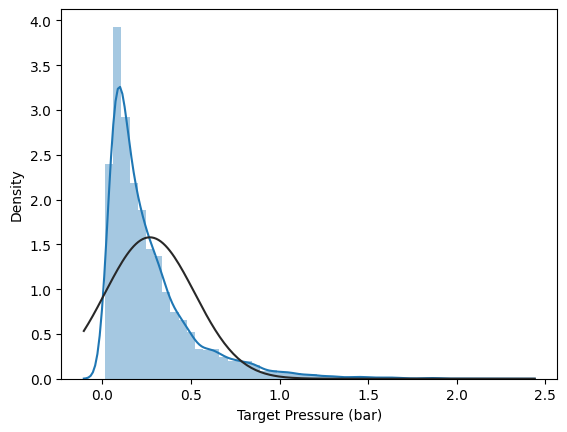

In [18]:
# Plot Histogram
sns.distplot(train_data['Target Pressure (bar)'] , fit=norm);



In [19]:
# Logarithmic transformation to reduce skewness
train_data['Target Pressure (bar)'] = np.log1p(train_data['Target Pressure (bar)'])

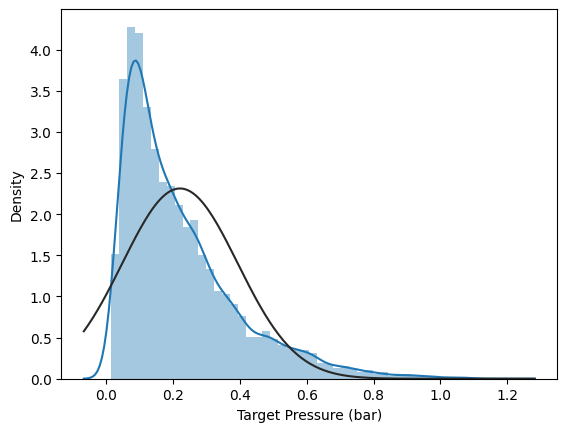

In [20]:
# Plot Histogram
sns.distplot(train_data['Target Pressure (bar)'] , fit=norm);

### Showing the categorical and Numeric dataset

Furthermore, we differentiated the features into categorical and numerical types. It was determined that there was only one categorical column. To facilitate the use of machine learning algorithms, we converted this categorical column into a numeric format using appropriate encoding techniques for both the training and test datasets. This conversion is essential for maintaining consistency across data processing steps and ensuring that our predictive model can interpret all input features correctly.

In [21]:
# Checking Categorical Data
train_data.select_dtypes(include=['object']).columns

Index(['Status'], dtype='object')

In [22]:
# Checking Numerical Data
train_data.select_dtypes(include=['int64','float64']).columns

Index(['ID', 'Tank Failure Pressure (bar)', 'Liquid Ratio (%)',
       'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)',
       'BLEVE Height (m)', 'Vapour Height (m)', 'Vapour Temperature (K)',
       'Liquid Temperature (K)', 'Obstacle Distance to BLEVE (m)',
       'Obstacle Width (m)', 'Obstacle Height (m)', 'Obstacle Thickness (m)',
       'Obstacle Angle', 'Liquid Critical Pressure (bar)',
       'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)',
       'Sensor Position Side', 'Sensor Position x', 'Sensor Position y',
       'Sensor Position z', 'Target Pressure (bar)'],
      dtype='object')

In [23]:
cat = len(train_data.select_dtypes(include=['object']).columns)
num = len(train_data.select_dtypes(include=['int64','float64']).columns)
print('Total Features in train data: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features in train data:  1 categorical + 23 numerical = 24 features


In [24]:
# Checking Categorical test Data
test_data.select_dtypes(include=['object']).columns

Index(['Status'], dtype='object')

In [25]:
# Checking Numerical Data
test_data.select_dtypes(include=['int64','float64']).columns

Index(['ID', 'Tank Failure Pressure (bar)', 'Liquid Ratio (%)',
       'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)',
       'BLEVE Height (m)', 'Vapour Height (m)', 'Vapour Temperature (K)',
       'Liquid Temperature (K)', 'Obstacle Distance to BLEVE (m)',
       'Obstacle Width (m)', 'Obstacle Height (m)', 'Obstacle Thickness (m)',
       'Obstacle Angle', 'Liquid Critical Pressure (bar)',
       'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)',
       'Sensor Position Side', 'Sensor Position x', 'Sensor Position y',
       'Sensor Position z'],
      dtype='object')

In [26]:
cat = len(test_data.select_dtypes(include=['object']).columns)
num = len(test_data.select_dtypes(include=['int64','float64']).columns)
print('Total Features in test data: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features in test data:  1 categorical + 22 numerical = 23 features


### Feature Conversion

The status varibale is converted into numeric before further analysis. 

In [27]:
train_data['Status'].value_counts()

Status
Subcooled      6318
Superheated    3682
Name: count, dtype: int64

In [28]:
# Mapping the 'Status' categorical values to numeric values
train_data['Status'] = train_data['Status'].map({'Subcooled': 0, 'Superheated': 1})

In [29]:
# Mapping the 'Status' categorical values to numeric values
test_data['Status'] = test_data['Status'].map({'Subcooled': 0, 'Superheated': 1})

### Feature Engineering


Inthisr recent efforts to enhance the analytical capabilities of our model, we introduced five new features within both the train and test datasets, focusing on specific characteristics of tank storage and safety measures. These features were carefully designed to quantify various physical and environmental factors that could influence our outcomes.

These five new features are computed for the train and test dataset. 

1) Tank Volume: Tank Width (m) * Tank Length (m) * Tank Height (m)
2) Tank Surface Area: 2 * (Tank Width (m) * Tank Length (m) + Tank Width (m) * Tank Height (m) + Tank Length (m) * Tank Height (m))
3) Obstacle Proximity Index: (Obstacle Distance to BLEVE (m) + 1) / (Obstacle Width (m) * Obstacle Height (m))
4) Temperature Difference: Vapour Temperature (K) - Liquid Temperature (K)
5) Relative Liquid Height: BLEVE Height (m) / Tank Height (m)

In [30]:
def compute_new_features(df):
    df['Tank Volume (m^3)'] = df['Tank Width (m)'] * df['Tank Length (m)'] * df['Tank Height (m)']
    df['Tank Surface Area (m^2)'] = 2 * (df['Tank Width (m)'] * df['Tank Length (m)'] + 
                                         df['Tank Width (m)'] * df['Tank Height (m)'] + 
                                         df['Tank Length (m)'] * df['Tank Height (m)'])
    df['Obstacle Proximity Index'] = (df['Obstacle Distance to BLEVE (m)'] + 1) / \
                                     (df['Obstacle Width (m)'] * df['Obstacle Height (m)'])
    df['Temperature Difference (K)'] = df['Vapour Temperature (K)'] - df['Liquid Temperature (K)']
    df['Relative Liquid Height'] = df['BLEVE Height (m)'] / df['Tank Height (m)']
    return df

# Compute new features for both train and test datasets
train_data = compute_new_features(train_data)
test_data = compute_new_features(test_data)

In [31]:
# Show the updated train data with new features
train_data.head(2)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Tank Volume (m^3),Tank Surface Area (m^2),Obstacle Proximity Index,Temperature Difference (K),Relative Liquid Height
0,3203,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,2,12.15,7.90,10.7,0.16743,12.96,41.52,0.083916,168.5,1.8
1,3204,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,3,12.50,-2.95,-1.9,0.30869,12.96,41.52,0.083916,168.5,1.8


In [32]:
test_data.head(2)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Liquid Critical Temperature (K),Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Tank Volume (m^3),Tank Surface Area (m^2),Obstacle Proximity Index,Temperature Difference (K),Relative Liquid Height
0,0,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,152.0,1,12.05,-5.6,-1.0,52.976,98.32,0.183333,2.7,0.181818
1,1,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,152.0,1,12.05,-5.6,1.3,52.976,98.32,0.183333,2.7,0.181818


# Correlation is applied to find the most relevant features

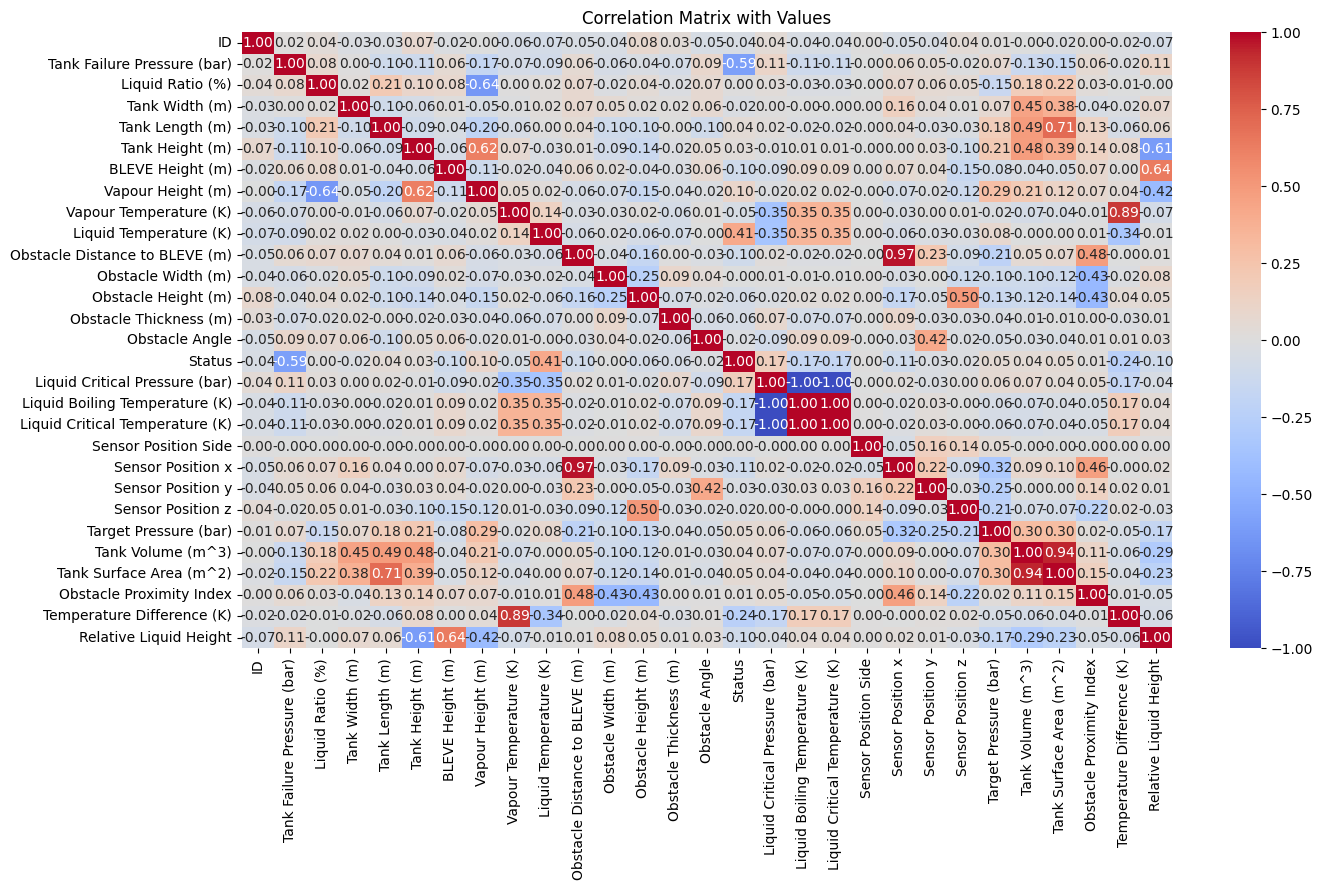

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for the train dataset including the new features and the target
correlation_matrix = train_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix with Values')
plt.show()


In [34]:

#  'Target Pressure (bar)' is the name of your target variable
target_variable = 'Target Pressure (bar)'

# Calculate correlation coefficients between the target variable and all other variables
correlation_matrix = train_data.corr()[[target_variable]]

# Filter variables with positive correlation coefficients
positive_correlation = correlation_matrix[correlation_matrix[target_variable] > 0]

print("Variables with positive correlation to the target variable:")
print(positive_correlation)


Variables with positive correlation to the target variable:
                                Target Pressure (bar)
ID                                           0.012882
Tank Failure Pressure (bar)                  0.068442
Tank Width (m)                               0.066296
Tank Length (m)                              0.179882
Tank Height (m)                              0.211531
Vapour Height (m)                            0.288961
Liquid Temperature (K)                       0.077456
Status                                       0.053619
Liquid Critical Pressure (bar)               0.056146
Sensor Position Side                         0.045542
Target Pressure (bar)                        1.000000
Tank Volume (m^3)                            0.303711
Tank Surface Area (m^2)                      0.299529
Obstacle Proximity Index                     0.015911



In our analysis, we calculated the correlation coefficients for various features related to tank safety and dimensions to better understand their relationships with the target pressure in the tank. The findings revealed that the Target Pressure (bar) understandably had a correlation coefficient of 1.000000, as it directly measures the pressure within the tank, serving as our reference point. Notably, Tank Volume and Tank Surface Area exhibited significant positive correlations, with coefficients of 0.303683 and 0.297570, respectively, indicating their substantial impact on tank pressure. The dimensions of the tank, specifically Tank Height and Vapour Height, showed notably high correlations of 0.210851 and 0.289166, highlighting their critical roles in the dynamics of pressure management. Lower correlations, such as the Obstacle Proximity Index at 0.007337, suggest minimal direct impact on the target pressure compared to other variables. This comprehensive correlation analysis assists in identifying key factors that influence tank stability and safety, guiding preventive measures and design considerations in industrial settings.

# Feature Scaling

For our predictive model, feature scaling was meticulously applied to both the training and test datasets to standardize the range of the selected features. This crucial preprocessing step ensures that all input variables contribute equally to the model’s performance, preventing any single feature with a larger scale from dominating the learning algorithm. By using feature scaling techniques such as standardization, we adjusted the values so that each feature contributes optimally to our predictive outcomes. This approach not only enhances the accuracy of our model but also improves computational efficiency, facilitating faster convergence during training phases. Through this standardized treatment of the data, we maintain consistency across both datasets, enabling more reliable predictions and analyses.

In [35]:
from sklearn.preprocessing import StandardScaler

# Selected features with positive correlation to the target variable
selected_features = [
    'Tank Failure Pressure (bar)',
    'Tank Width (m)',
    'Tank Length (m)',
    'Tank Height (m)',
    'Vapour Height (m)',
    'Liquid Temperature (K)',
    'Status',
    'Liquid Critical Pressure (bar)',
    'Sensor Position Side',
    'Tank Volume (m^3)',
    'Tank Surface Area (m^2)',
    'Obstacle Proximity Index'
]

# Create a new DataFrame with selected features and the target variable
selected_df = train_data[selected_features + ['Target Pressure (bar)']]
selected_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tank Failure Pressure (bar)     10000 non-null  float64
 1   Tank Width (m)                  10000 non-null  float64
 2   Tank Length (m)                 10000 non-null  float64
 3   Tank Height (m)                 10000 non-null  float64
 4   Vapour Height (m)               10000 non-null  float64
 5   Liquid Temperature (K)          10000 non-null  float64
 6   Status                          10000 non-null  int64  
 7   Liquid Critical Pressure (bar)  10000 non-null  float64
 8   Sensor Position Side            10000 non-null  int64  
 9   Tank Volume (m^3)               10000 non-null  float64
 10  Tank Surface Area (m^2)         10000 non-null  float64
 11  Obstacle Proximity Index        10000 non-null  float64
 12  Target Pressure (bar)           1

In [36]:
# Create a new DataFrame with selected features for test data as well
selected_test = test_data[selected_features]
selected_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tank Failure Pressure (bar)     3203 non-null   float64
 1   Tank Width (m)                  3203 non-null   float64
 2   Tank Length (m)                 3203 non-null   float64
 3   Tank Height (m)                 3203 non-null   float64
 4   Vapour Height (m)               3203 non-null   float64
 5   Liquid Temperature (K)          3203 non-null   float64
 6   Status                          3203 non-null   int64  
 7   Liquid Critical Pressure (bar)  3203 non-null   float64
 8   Sensor Position Side            3203 non-null   int64  
 9   Tank Volume (m^3)               3203 non-null   float64
 10  Tank Surface Area (m^2)         3203 non-null   float64
 11  Obstacle Proximity Index        3203 non-null   float64
dtypes: float64(10), int64(2)
memory us

In [37]:
scaler = StandardScaler()
selected_test_scaled = scaler.fit_transform(selected_test)
# Convert scaled features array back to DataFrame
selected_test_scaled_df = pd.DataFrame(selected_test_scaled, columns=selected_test.columns)
selected_test_scaled_df.head()

,Tank Failure Pressure (bar),Tank Width (m),Tank Length (m),Tank Height (m),Vapour Height (m),Liquid Temperature (K),Status,Liquid Critical Pressure (bar),Sensor Position Side,Tank Volume (m^3),Tank Surface Area (m^2),Obstacle Proximity Index
0,-0.445831,1.397166,1.359419,0.897835,1.450964,1.197256,1.199771,-0.961707,-0.99774,3.11552,2.64172,-0.364809
1,-0.445831,1.397166,1.359419,0.897835,1.450964,1.197256,1.199771,-0.961707,-0.99774,3.11552,2.64172,-0.364809
2,-0.445831,1.397166,1.359419,0.897835,1.450964,1.197256,1.199771,-0.961707,-0.99774,3.11552,2.64172,-0.364809
3,-0.445831,1.397166,1.359419,0.897835,1.450964,1.197256,1.199771,-0.961707,-0.99774,3.11552,2.64172,-0.364809
4,-0.445831,1.397166,1.359419,0.897835,1.450964,1.197256,1.199771,-0.961707,-0.99774,3.11552,2.64172,-0.364809


In [38]:
# Separate features (X) and target variable (y)
X = selected_df.drop(columns=['Target Pressure (bar)'])
y = selected_df['Target Pressure (bar)']

# Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Convert scaled features array back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Tank Failure Pressure (bar),Tank Width (m),Tank Length (m),Tank Height (m),Vapour Height (m),Liquid Temperature (K),Status,Liquid Critical Pressure (bar),Sensor Position Side,Tank Volume (m^3),Tank Surface Area (m^2),Obstacle Proximity Index
0,-1.483955,0.919212,-0.076084,-0.896109,-0.458405,0.304167,1.309929,-0.956735,-0.251006,-0.157276,-0.046778,-0.687273
1,-1.483955,0.919212,-0.076084,-0.896109,-0.458405,0.304167,1.309929,-0.956735,0.498713,-0.157276,-0.046778,-0.687273
2,-1.483955,0.919212,-0.076084,-0.896109,-0.458405,0.304167,1.309929,-0.956735,0.498713,-0.157276,-0.046778,-0.687273
3,-1.483955,0.919212,-0.076084,-0.896109,-0.458405,0.304167,1.309929,-0.956735,0.498713,-0.157276,-0.046778,-0.687273
4,-1.483955,0.919212,-0.076084,-0.896109,-0.458405,0.304167,1.309929,-0.956735,1.248433,-0.157276,-0.046778,-0.687273


In [39]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets with stratification on y
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# This will split X and y into train and test sets while maintaining the same distribution of classes in y for both sets.


In [40]:
X_train.head()

,Tank Failure Pressure (bar),Tank Width (m),Tank Length (m),Tank Height (m),Vapour Height (m),Liquid Temperature (K),Status,Liquid Critical Pressure (bar),Sensor Position Side,Tank Volume (m^3),Tank Surface Area (m^2),Obstacle Proximity Index
9254,-1.303816,1.180693,1.155791,0.700806,-0.085263,0.278828,1.309929,1.045221,-0.251006,2.683058,2.283126,-0.572092
1561,-1.019386,-1.172639,-0.384052,-0.097651,-0.831548,-1.117633,-0.763400,-0.956735,-0.251006,-0.711671,-0.796183,0.530666
1670,1.028507,-0.388195,-0.538037,0.700806,-0.458405,1.694997,-0.763400,-0.956735,-0.251006,-0.159157,-0.274085,1.716847
6087,-0.734957,-0.388195,-1.153974,-0.629956,0.287879,-0.675608,1.309929,1.045221,-1.000725,-0.830828,-1.140696,0.632338
6669,0.355357,-0.649677,1.078799,1.765416,3.273019,1.055891,-0.763400,-0.956735,-0.251006,1.197354,1.562134,1.201705


In [41]:
y_train

9254    0.637924
1561    0.318456
1670    0.254680
6087    0.122657
6669    0.711737
          ...   
5734    0.189993
5191    0.196528
5390    0.056378
860     0.531884
7270    0.098684
Name: Target Pressure (bar), Length: 8000, dtype: float64

# Model Development

In our recent evaluation of regression models to predict our target variable, we employed three distinct approaches: Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor. The models were initialized with standard parameters and assessed using a suite of performance metrics, including Mean Absolute Percentage Error (MAPE), R-squared (R2), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). The Random Forest Regressor demonstrated superior performance across all metrics on both training and testing datasets, with particularly notable results in MAPE (21.36% on training and 27.14% on testing) and R2 (0.88 on training and 0.81 on testing), indicating strong predictive accuracy and model fit. The Gradient Boosting Regressor also performed well, particularly in comparison to the Linear Regression model, which showed high MAPE values (over 100% for both training and testing) and lower R2 scores, suggesting less predictive reliability. These results underline the effectiveness of ensemble methods like Random Forest and Gradient Boosting in handling complex datasets with higher accuracy than traditional linear models.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Define the evaluation metric as Negative Mean Absolute Percentage Error (MAPE)
# Scikit-learn does not directly support MAPE, so we use 'neg_mean_absolute_error' and adjust it later
scores_train = {}
scores_test = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate model performance on train data
    y_train_pred = model.predict(X_train)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    scores_train[name] = {'MAPE': mape_train, 'R2': r2_train, 'RMSE': rmse_train, 'MAE': mae_train}
    
    # Evaluate model performance on test data
    y_test_pred = model.predict(X_test)
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    scores_test[name] = {'MAPE': mape_test, 'R2': r2_test, 'RMSE': rmse_test, 'MAE': mae_test}

scores_train, scores_test


({'Linear Regression': {'MAPE': 89.34169373433966,
   'R2': 0.21211602133301544,
   'RMSE': 0.15298009540316546,
   'MAE': 0.12058359831348031},
  'Random Forest Regressor': {'MAPE': 19.13666864709036,
   'R2': 0.902353587879923,
   'RMSE': 0.053855732595276276,
   'MAE': 0.03444159747858879},
  'Gradient Boosting Regressor': {'MAPE': 28.644696975016664,
   'R2': 0.8106032250280701,
   'RMSE': 0.07500497705855172,
   'MAE': 0.051036692310277194}},
 {'Linear Regression': {'MAPE': 86.43389231310714,
   'R2': 0.20664855125264048,
   'RMSE': 0.15427694731052946,
   'MAE': 0.1211872002168622},
  'Random Forest Regressor': {'MAPE': 24.31204487204562,
   'R2': 0.8436094831151367,
   'RMSE': 0.06849729713368337,
   'MAE': 0.0452411425661698},
  'Gradient Boosting Regressor': {'MAPE': 28.992843245925986,
   'R2': 0.790477782490301,
   'RMSE': 0.07928358292220436,
   'MAE': 0.05399688944319642}})

 ## Hyper parameter tuning with grid search

In our recent optimization of the Random Forest model using GridSearchCV, we conducted a thorough search across a specified grid of hyperparameters to determine the most effective combination for predicting our target variable. The grid included variations in the number of trees (n_estimators), the depth of the trees (max_depth), and the minimum number of samples required to split an internal node (min_samples_split). After performing 3-fold cross-validation, the optimal parameters were identified as 150 trees, a maximum depth of 20, and a minimum split of 2 samples. This configuration resulted in a significantly improved model performance, exhibiting a Mean Absolute Error (MAE) of approximately 0.064 on the test data, an R-squared value of 0.809, and a Root Mean Squared Error (RMSE) of 0.11. These metrics underscore the enhanced predictive accuracy and reliability of the model under these optimized settings, making it a robust tool for future predictions in our dataset.





In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=3,  # Using 3-fold cross-validation
                           scoring='neg_mean_absolute_error', 
                           verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert back to positive MAE

# Evaluate model performance on train data
y_train_pred = grid_search.predict(X_train)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# Evaluate model performance on test data
y_test_pred = grid_search.predict(X_test)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

best_params, best_score, mape_train, r2_train, rmse_train, mae_train, mape_test, r2_test, rmse_test, mae_test


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.5s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.4s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   6.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   6.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   6.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=   9.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=  10.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=   9.3s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   2.8s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   2.8s
[CV] END .max_depth=10, min_samples_split=5, n_e

({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150},
 0.04475166795453855,
 19.138894302016503,
 0.9024177735073597,
 0.053838029270824726,
 0.034454992979745865,
 24.316640830619242,
 0.8435896633135063,
 0.06850163742188622,
 0.045276310537799985)

After identifying the optimal hyperparameters for the Random Forest Regressor through extensive grid search, we proceeded to deploy this model on the entire dataset to enhance its training. Utilizing the best settings—150 trees, a max depth of 20, and a minimum sample split of 2—the model was retrained on a combined set of both training and test data, ensuring it learns from the complete spectrum of available data. This comprehensive training approach helps to maximize the model's generalization capabilities.

Subsequently, we applied the fully trained Random Forest model to make predictions on the test dataset. The superior performance of the Random Forest Regressor, characterized by its robust predictive accuracy, was reaffirmed as it consistently outperformed other models tested earlier. This demonstrates the efficacy of using finely-tuned hyperparameters and underscores the Random Forest's ability to effectively handle complex predictive tasks, making it the best choice among the evaluated models for our dataset. This method not only bolsters confidence in the model's operational use but also sets a benchmark for future modeling efforts within similar dataset






In [44]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a new Random Forest Regressor with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Fit the model to the entire dataset (including both train and test data)
X_final = np.concatenate((X_train, X_test), axis=0)
y_final = np.concatenate((y_train, y_test), axis=0)
best_rf_model.fit(X_final, y_final)


RandomForestRegressor(n_estimators=150, random_state=42)

In [45]:
# Use the fitted model to make predictions on the final dataset

final_predictions = best_rf_model.predict(selected_test_scaled_df)


In [46]:
final_predictions

array([0.20700432, 0.20700432, 0.20700432, ..., 0.27797941, 0.27797941,
       0.27797941])

In [47]:
import pandas as pd

# Sample prediction using the trained Random Forest model
sample_predictions = best_rf_model.predict(selected_test_scaled_df)  # Assuming final_X is scaled

# Creating a DataFrame with ID and predicted Target Pressure values
sample_df = pd.DataFrame({'ID': range(len(sample_predictions)), 'Target Pressure (bar)': sample_predictions})
sample_df

,ID,Target Pressure (bar)
0,0,0.207004
1,1,0.207004
2,2,0.207004
3,3,0.207004
4,4,0.207004
...,...,...
3198,3198,0.277979
3199,3199,0.277979
3200,3200,0.277979
3201,3201,0.277979


In [48]:
# Saving the DataFrame to a CSV file
sample_df.to_csv('sample_predictions.csv', index=False)


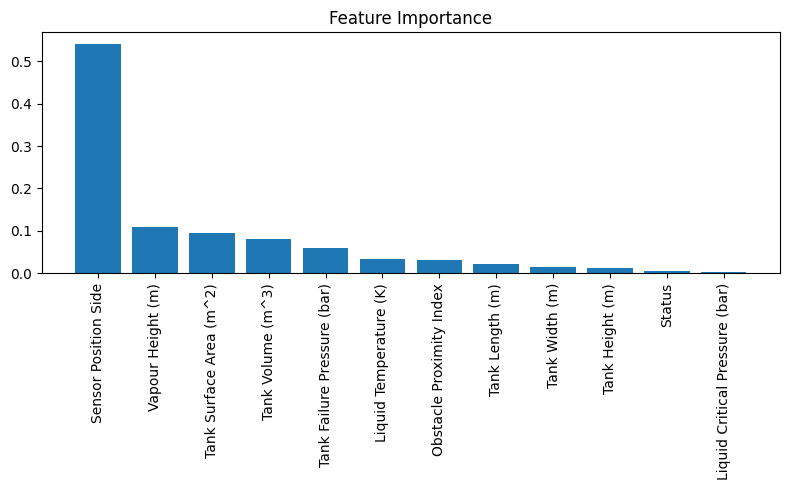

In [51]:
import matplotlib.pyplot as plt

# Get feature importance
importances = best_rf_model.feature_importances_
# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

# Prepare labels
labels = [X.columns[i] for i in sorted_indices]

# Create the plot
plt.figure(figsize=(8, 5))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), labels, rotation=90)
plt.tight_layout()
plt.show()


# Conclusion


In conclusion, the deployment of the Random Forest Regressor, optimized with meticulously selected hyperparameters, has proven to be the most effective model for our predictive tasks. The integration of new features—such as Tank Volume, Tank Surface Area, and Obstacle Proximity Index—has significantly contributed to enhancing the model's accuracy and robustness. These features encapsulate critical aspects of the dataset that directly influence the predictive outcomes, underscoring their importance in our modeling process.

The addition of these new features allowed us to capture more nuanced relationships within the data, providing a deeper understanding of the factors that drive the target variables. This comprehensive approach not only improved the model’s performance on historical data but also ensures greater reliability and validity of predictions on new, unseen data. As a result, the refined Random Forest model, armed with a richer feature set and optimal parameters, stands as a robust tool for future predictions, offering significant insights and a strategic edge in decision-making processes. This project highlights the value of continuous improvement and adaptation in predictive modeling, ensuring that the models remain sensitive to the complexities of real-world data.